In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import splitfolders
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

#### Image Parameters

In [2]:
batch_size = 32
img_height = 256
img_width = 256
img_channels = 3

#### Data

In [3]:
train_split_test_dir='../0. Project Data/Reshaped zero-padded and split data'
train_ds = image_dataset_from_directory(
    train_split_test_dir + '/train',
    image_size=(img_width, img_height),
    batch_size=batch_size)
val_ds = image_dataset_from_directory(
    train_split_test_dir + '/val',
    image_size=(img_width, img_height),
    batch_size=batch_size)
test_ds = image_dataset_from_directory(
    train_split_test_dir + '/test',
    image_size=(img_width, img_height),
    batch_size=batch_size)

Found 2678 files belonging to 4 classes.
Found 667 files belonging to 4 classes.
Found 843 files belonging to 4 classes.


Here we use the convolutional base from a pre-trained model trained with ImageNet dataset. We freeze the weights on the convolutional base because if we don't, the randomly initialized dense classifying layers will backpropogate and destroy all the learning from our pretrained convolutional base.

In [4]:
conv_base = keras.applications.vgg16.VGG16(
 weights='imagenet',
 include_top=False)
conv_base.trainable = False

In [5]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [6]:
# enginerring more data by applying randomized horizontal flips, zooms(+/- 20%), and rotates (+/- 10%)
data_augmentation = keras.Sequential([layers.RandomFlip('horizontal'), layers.RandomRotation(0.1), layers.RandomZoom(0.2),])

In [7]:
inputs = keras.Input(shape=(img_height, img_width, img_channels))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(4, activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 256, 256, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 256, 256, 3)      0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                             

In [9]:
#Try loss='mean_squared_error', optimizer='adam' 

In [10]:
model.compile(loss='sparse_categorical_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])

In [11]:
#callbacks_list = [
#    keras.callbacks.ModelCheckpoint(filepath="transfer_learning_checkpoints.keras",monitor="val_loss",save_best_only=True,)
#]

In [12]:
history = model.fit(
 train_ds,
 epochs=100,
 validation_data=val_ds
    #,
 #callbacks=callbacks_list
)

Epoch 1/100
84/84 [==============================] - 56s 541ms/step - loss: 25.1372 - accuracy: 0.8402 - val_loss: 14.3654 - val_accuracy: 0.9145
Epoch 2/100
84/84 [==============================] - 32s 385ms/step - loss: 10.7837 - accuracy: 0.9104 - val_loss: 8.6387 - val_accuracy: 0.9220
Epoch 3/100
84/84 [==============================] - 32s 382ms/step - loss: 4.9276 - accuracy: 0.9309 - val_loss: 10.6000 - val_accuracy: 0.8906
Epoch 4/100
84/84 [==============================] - 32s 381ms/step - loss: 3.2468 - accuracy: 0.9347 - val_loss: 8.0907 - val_accuracy: 0.9055
Epoch 5/100
84/84 [==============================] - 32s 386ms/step - loss: 3.2272 - accuracy: 0.9410 - val_loss: 3.0659 - val_accuracy: 0.9310
Epoch 6/100
84/84 [==============================] - 33s 387ms/step - loss: 2.0609 - accuracy: 0.9537 - val_loss: 3.8871 - val_accuracy: 0.9295
Epoch 7/100
84/84 [==============================] - 32s 385ms/step - loss: 1.9365 - accuracy: 0.9459 - val_loss: 2.5974 - val_accur

Epoch 41/100
84/84 [==============================] - 32s 379ms/step - loss: 0.5696 - accuracy: 0.9783 - val_loss: 6.0123 - val_accuracy: 0.9145
Epoch 42/100
84/84 [==============================] - 32s 377ms/step - loss: 1.1981 - accuracy: 0.9642 - val_loss: 4.8554 - val_accuracy: 0.9415
Epoch 43/100
84/84 [==============================] - 32s 378ms/step - loss: 1.7299 - accuracy: 0.9656 - val_loss: 7.0775 - val_accuracy: 0.9205
Epoch 44/100
84/84 [==============================] - 31s 372ms/step - loss: 0.9114 - accuracy: 0.9757 - val_loss: 3.8466 - val_accuracy: 0.9460
Epoch 45/100
84/84 [==============================] - 31s 374ms/step - loss: 1.3357 - accuracy: 0.9656 - val_loss: 8.8377 - val_accuracy: 0.9175
Epoch 46/100
84/84 [==============================] - 32s 377ms/step - loss: 0.9068 - accuracy: 0.9750 - val_loss: 4.6812 - val_accuracy: 0.9325
Epoch 47/100
84/84 [==============================] - 32s 377ms/step - loss: 0.7508 - accuracy: 0.9783 - val_loss: 3.4525 - val_ac

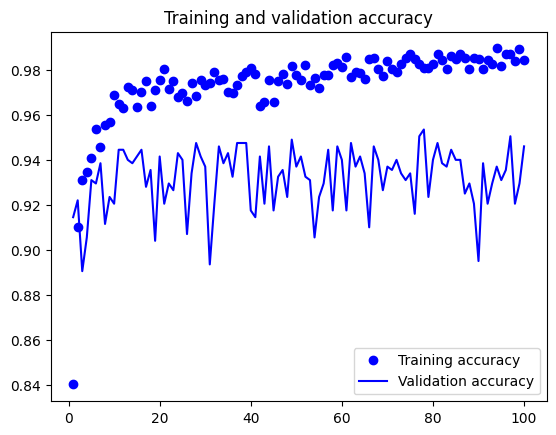

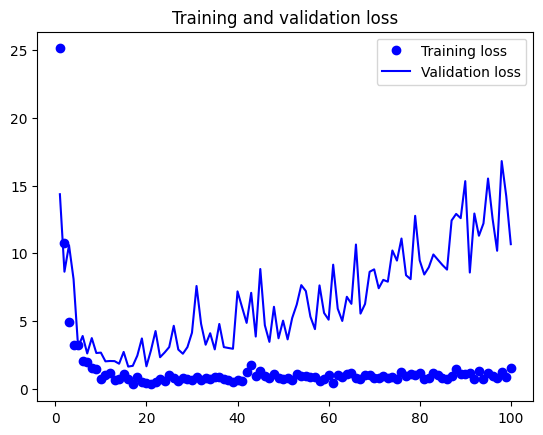

In [13]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()